In [7]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

Ideally as stated in the guidelines we would want to keep our data tucked away until it was ready to be thrown into the model however we will most likely have to expose the data to our model early as we are trying to also see how well our model can calculate inflations rates which will also impact stock prices over time and then also use the previous stock prices to calculate current and future stock prices. Luckily for us we will be exposing the same data to our model every time so we will not have to worry about random seed generators.

In [2]:
df = pd.read_csv('./Coca-Cola_stock_history.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


While initially printing our data we were surprised to see Dividends because we had forgotten that is also an asset that comes with the purchase of Coco-Cola Stock. We recognize that company decisions to increase or decrease dividen yields may affect if people decide to purchase a stock which then affects the overall stock price in the long run. 

In [4]:
df.iloc[70:107]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
70,1962-04-11,0.047973,0.048222,0.046665,0.046852,883200,0.0,0
71,1962-04-12,0.046603,0.046603,0.045855,0.045979,1075200,0.0,0
72,1962-04-13,0.045979,0.047350,0.045232,0.047350,1804800,0.0,0
73,1962-04-16,0.047350,0.048098,0.047226,0.047475,2227200,0.0,0
74,1962-04-17,0.047475,0.047973,0.047101,0.047724,1152000,0.0,0
75,1962-04-18,0.047724,0.047973,0.047599,0.047973,691200,0.0,0
76,1962-04-19,0.047973,0.048036,0.047724,0.048036,806400,0.0,0
77,1962-04-23,0.048036,0.048596,0.047911,0.048098,691200,0.0,0
78,1962-04-24,0.048098,0.048347,0.047724,0.048347,883200,0.0,0
79,1962-04-25,0.048222,0.048222,0.047724,0.047724,422400,0.0,0


For data cleaning, the first column representing 'Date' has 2 formats as shown above. One format just has the YEAR-MM-DD date, while some other entries have the time along with the YEAR-MM-DD for the 'Date' column. We just want the format to be YEAR-MM-DD, so a few lines will strip the 'Date' column and keep just the YEAR-MM-DD part.

In [5]:
# There are dates in two formats, with and without time, we just want the date
df['date'] = pd.to_datetime(df['Date'].str.split().str[0])
df = df.drop(columns=['Date'])
df.iloc[70:107]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
70,0.047973,0.048222,0.046665,0.046852,883200,0.0,0,1962-04-11
71,0.046603,0.046603,0.045855,0.045979,1075200,0.0,0,1962-04-12
72,0.045979,0.047350,0.045232,0.047350,1804800,0.0,0,1962-04-13
73,0.047350,0.048098,0.047226,0.047475,2227200,0.0,0,1962-04-16
74,0.047475,0.047973,0.047101,0.047724,1152000,0.0,0,1962-04-17
75,0.047724,0.047973,0.047599,0.047973,691200,0.0,0,1962-04-18
76,0.047973,0.048036,0.047724,0.048036,806400,0.0,0,1962-04-19
77,0.048036,0.048596,0.047911,0.048098,691200,0.0,0,1962-04-23
78,0.048098,0.048347,0.047724,0.048347,883200,0.0,0,1962-04-24
79,0.048222,0.048222,0.047724,0.047724,422400,0.0,0,1962-04-25


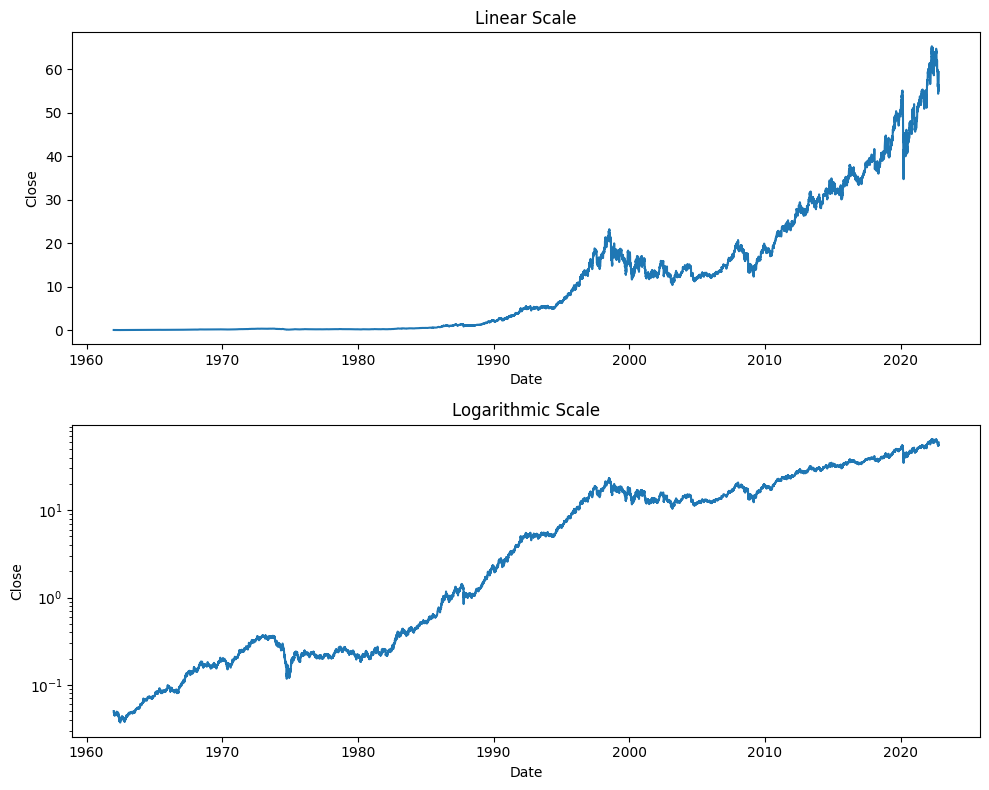

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
for i, log in enumerate([False, True]):
    ax = axs[i]
    ax.set_title('Logarithmic Scale' if log else 'Linear Scale')
    ax.plot(df['date'], df['Close'])
    if log:
        ax.set_yscale('log')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Close')

plt.tight_layout()
plt.show()

This is accurate as to what we would expect to see. The price of Coke Stock increases over time due to inflation as well as the value of the company increasing as they gain more capital. We could decide to analyze some of the spikes to see if there were outside economic factors that we need to consider in our model or if they were publicity and branding issues that could have influenced the stock price.

In terms of potential missing data, the only data that we could be missing are the outside economic and political situations that surround the coco-cola company that affected the stock prices. An example of this is when Ronaldo promoted water over coco-cola causing coke stock to dip, or things like COVID-19 and the effect that it had on all companies. These could be tricky to model because we would need to somehow factor that into the future prices of coco-cola stock. Luckily we do have access to the previous years which is likely similar in some way to if there were political or economic issues today. One potential solution could be to analyze the pattern of ups and downs that coke stock has gone through in the past and then assume the pattern will continue and hopefully that will account for a certain number of "catastophes" over the years in the future that will influence prices.

It's possible that we need to weight volume of sales as well as price equally rather than just focusing on just price because we need to account for the amount of trade happening to see how that can affect pricing in the future.

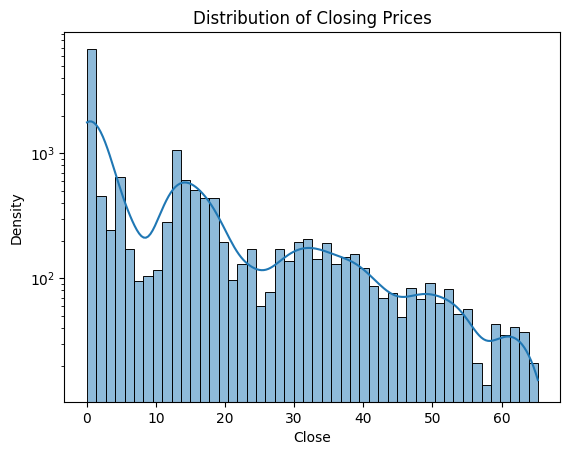

In [17]:
sns.histplot(data=df, x='Close', kde=True)
plt.xlabel('Close')
plt.ylabel('Density')
plt.title('Distribution of Closing Prices')
plt.yscale('log')
plt.show()

A lot of the outlier data seemingly seems to be during the earlier years of the company when things were more unstable. Analyzing the more modern years it is easier to notice patterns and it is easier to recoginize a more significant trend in the data. I think that we will have to account for previous years however more heavily weight our predictions off more current years.

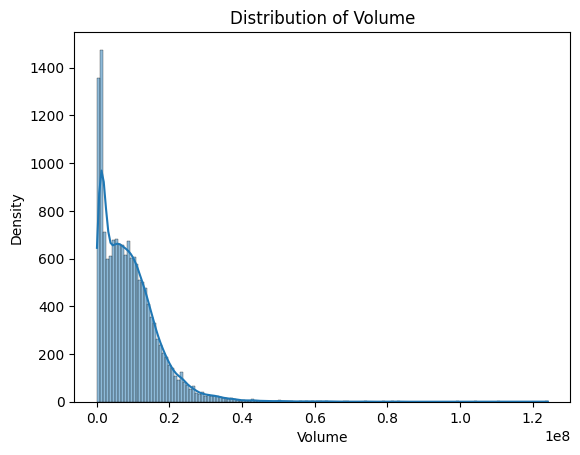

In [16]:
sns.histplot(data=df, x='Volume', kde=True)
plt.xlabel('Volume')
plt.ylabel('Density')
plt.title('Distribution of Volume')
#plt.yscale('log')
plt.show()

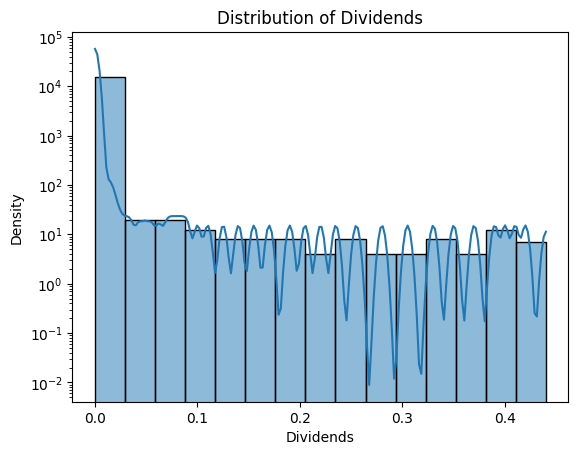

In [14]:
sns.histplot(data=df, x='Dividends', kde=True)
plt.xlabel('Dividends')
plt.ylabel('Density')
plt.title('Distribution of Dividends')
plt.yscale('log')
plt.show()

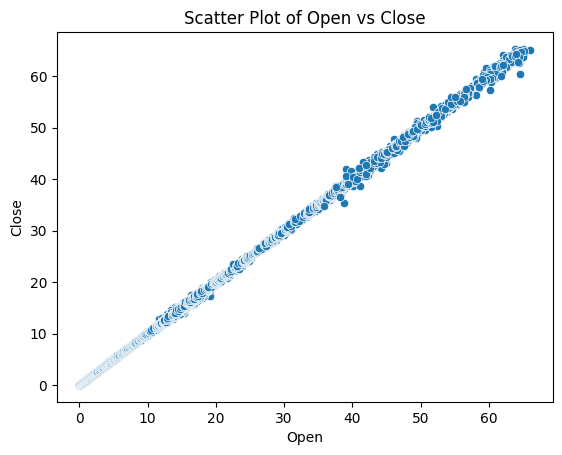

In [19]:
sns.scatterplot(data=df, x='Open', y='Close')
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Scatter Plot of Open vs Close')
plt.show()

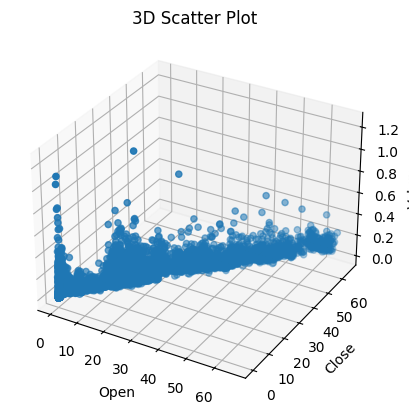

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Open'], df['Close'], df['Volume'])
ax.set_xlabel('Open')
ax.set_ylabel('Close')
ax.set_zlabel('Volume')
plt.title('3D Scatter Plot')
plt.show()

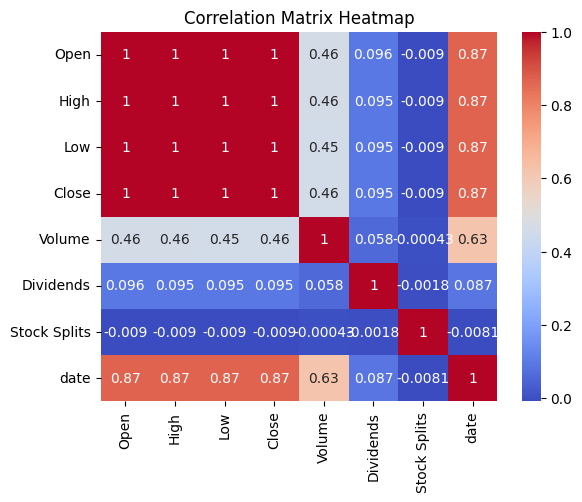

In [21]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

There clearly is a higher relation between volume and pricing as well as the date and pricing. Therefore we need to take volume, price and date heavily into consideration when creating our model. 

Noticing a trend in pricing we want to create an accurate model and so we will need to factor in more than just price is increasing over the years. We will also want to model how inflation could affect the price, or how publicity could affect the price. All of these other factors will need to be somehow implimented into the model and we will either need to gather new data for those aspects or somehow derive them from the current data that we possess. However, the data that we currently have is a great starting point for our project.